<a href="https://colab.research.google.com/github/rajeshmore1/Performance---Fireducks-Vs-Pandas/blob/main/Fireducks_Vs_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fireducks vs Pandas: Performance Comparison

https://fireducks-dev.github.io/docs/get-started/

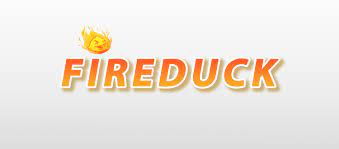

In [2]:
#%%capture
!pip install fireducks

  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 15.0.2
    Uninstalling pyarrow-15.0.2:
      Successfully uninstalled pyarrow-15.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [13]:
#%%capture
!pip install pyarrow==15.0.2



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.2 which is incompatible.
fireducks 1.0.5 requires pyarrow<17.1,>=17.0, but you have pyarrow 15.0.2 which is incompatible.


In [1]:
import fireducks.pandas as fd # you can import as pd


In [2]:
#import pandas as pd
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# 1. Introduction
## What is FireDucks?
FireDucks is a python library developed by NEC to speed up the analysis of “pandas”. It is said to make use of NEC’s high-performance programming technology and performance tuning know-how developed over more than 30 years of supercomputer development!

This notebook compares the performance of Fireducks, a fast alternative to pandas,with pandas itself. We'll perform various operations and measure the execution time
for both libraries.

# Load and run data

We used the Video_Ads Engagement Dataset from Kaggle. The dataset is about 500MB and contains 3 million video ad auctions.

I could successfully execute the exact same code written for pandas. The loading speed was extremely faster. In my environment, it took 4 seconds with pandas, but with FireDucks it took 74.5ns.



In [14]:
%%timeit
df_pandas = pd.read_csv("ad_df.csv")

26.1 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
df_pandas = pd.read_csv("ad_df.csv")

In [11]:
%%timeit
df_fireducks = fd.read_csv("ad_df.csv")

21 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
df_fireducks = fd.read_csv("ad_df.csv")

In [19]:
df_fireducks.head()

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8
2,000c4c0c-0789-4e50-8ba6-a4be920ab482,1517339899,60,201430,214063,2643.0,25817,fr,20824,co.uk/hastingsobserver/news,uk,iOS,Facebook App,NaN,Tablet,NaN,1
3,000db509-3350-4cd9-b60a-d506fbd31f29,1517346542,29,198262,215400,2244.0,86526,fr,39091,com/slate/news-and-politics,us,Windows,Chrome,63.0,PersonalComputer,18.166666,1
4,001300de-8eda-480f-bec8-4b46ef6117f2,1517310926,29,174590,184750,3617.0,85350,fr,14796,co.uk/independent/arts-entertainment,uk,Windows,Firefox,58.0,PersonalComputer,NaN,0


In [26]:
%%timeit
# 1. analysis based on time period and creative duration
# convert timestamp to date/time object
df_pandas['timestamp_converted'] = pd.to_datetime(df_pandas['timestamp'], unit='s')

# define time period
def get_part_of_day(hour):
  if 5 <= hour < 12:
    return 'morning'
  elif 12 <= hour < 17:
    return 'afternoon'
  else:
    return 'evening'

# Add time period in new column
df_pandas['part_of_day'] = df_pandas['timestamp_converted'].apply(lambda x: get_part_of_day(x.hour))

# Calculate average creative duration by time period
df_duration_by_time = df_pandas.groupby('part_of_day')['creative_duration'].mean()
print(df_duration_by_time)
"""
# 2. campaign performance per different advertiser
df_campaigns_per_advertiser = df_pandas.groupby('advertiser_id')['campaign_id'].nunique()
df_creatives_per_advertiser = df_pandas.groupby('advertiser_id ')['creatives_id'].nunique()
print(df_campaigns_per_advertiser)
print(df_creatives_per_advertiser)
"""
# 3. language and website association
df_common_website_per_language = df_pandas.groupby('placement_language')['website_id'].apply(lambda x: x.mode()[0])
print(df_common_website_per_language)



part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.

In [27]:
%%timeit
# 1. analysis based on time period and creative duration
# convert timestamp to date/time object
df_fireducks['timestamp_converted'] = pd.to_datetime(df_fireducks['timestamp'], unit='s')

# define time period
def get_part_of_day(hour):
  if 5 <= hour < 12:
    return 'morning'
  elif 12 <= hour < 17:
    return 'afternoon'
  else:
    return 'evening'

# Add time period in new column
df_fireducks['part_of_day'] = df_fireducks['timestamp_converted'].apply(lambda x: get_part_of_day(x.hour))

# Calculate average creative duration by time period
df_duration_by_time = df_fireducks.groupby('part_of_day')['creative_duration'].mean()
print(df_duration_by_time)

# 3. language and website association
df_common_website_per_language = df_fireducks.groupby('placement_language')['website_id'].apply(lambda x: x.mode()[0])
print(df_common_website_per_language)



part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.

# Second Experience:

# Importing Libraries




In [8]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [9]:
import platform, psutil
print("="*30, "Evaluation Environment Information", "="*30)
print(f'platform: {platform.system()}')
print(f'architecture: {platform.machine()}')
print(f'processor: {platform.processor()}')
print(f'cpu: {psutil.cpu_count()}')
print(f'ram: {str(round(psutil.virtual_memory().total / (1024 ** 3)))} GB')

============================== Evaluation Environment Information ==============================
platform: Linux
architecture: x86_64
processor: x86_64
cpu: 2
ram: 13 GB


In [10]:
print(f"{pd.__name__} == {pd.__version__}")


pandas == 2.1.4


In [11]:
DATASET = "ad_df.csv"
pandas_exec_time_tracker = []

In [12]:
start_time = time.time()
data = pd.read_csv(DATASET)
data_load_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for data loading: {data_load_t} seconds")
pandas_exec_time_tracker.append(data_load_t)
data.head()

[pandas] Time taken for data loading: 22.35560154914856 seconds


,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8
2,000c4c0c-0789-4e50-8ba6-a4be920ab482,1517339899,60,201430,214063,2643.0,25817,fr,20824,co.uk/hastingsobserver/news,uk,iOS,Facebook App,NaN,Tablet,NaN,1
3,000db509-3350-4cd9-b60a-d506fbd31f29,1517346542,29,198262,215400,2244.0,86526,fr,39091,com/slate/news-and-politics,us,Windows,Chrome,63.0,PersonalComputer,18.166666,1
4,001300de-8eda-480f-bec8-4b46ef6117f2,1517310926,29,174590,184750,3617.0,85350,fr,14796,co.uk/independent/arts-entertainment,uk,Windows,Firefox,58.0,PersonalComputer,NaN,0


In [13]:
pandas_exec_time_tracker

[22.35560154914856]

In [14]:
start_time = time.time()
distribution = data[['ua_device']].value_counts(sort=False)
q1_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for the calculation of rating distribution: {q1_t} seconds")
pandas_exec_time_tracker.append(q1_t)
distribution


[pandas] Time taken for the calculation of rating distribution: 1.2690837383270264 seconds


,count
ua_device,
ConnectedTv,90
PersonalComputer,1022438
Phone,1674503
Tablet,302771


In [15]:
pandas_exec_time_tracker

[22.35560154914856, 1.2690837383270264]

In [16]:
start_time = time.time()
data['length'] = data['referer_deep_three'].str.len()
q2_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken to create a new column with length information: {q2_t} seconds")
pandas_exec_time_tracker.append(q2_t)

[pandas] Time taken to create a new column with length information: 2.90619158744812 seconds


In [17]:
pandas_exec_time_tracker

[22.35560154914856, 1.2690837383270264, 2.90619158744812]

In [18]:
start_time = time.time()
count_by_id = data.groupby("website_id").size().reset_index(name="count")
top_10 = count_by_id.sort_values(by="count", ascending=False).head(10)
q3_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 populated website_id: {q3_t} seconds")
pandas_exec_time_tracker.append(q3_t)
top_10

[pandas] Time taken for finding top-10 populated website_id: 0.1535506248474121 seconds


,website_id,count
1794,39541,109522
276,23625,101074
903,31270,99110
88,19190,94688
2446,44878,80472
69,16979,55765
93,19318,55177
1067,32868,54437
49,16183,51673
1971,41214,44827


In [19]:
pandas_exec_time_tracker

[22.35560154914856, 1.2690837383270264, 2.90619158744812, 0.1535506248474121]

In [20]:
start_time = time.time()
count_by_userid = data.groupby("auction_id").size().reset_index(name="auction_count")
popular_user = count_by_userid.sort_values(by="auction_count", ascending=False).head(10)
q4_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 auction_id: {q4_t} seconds")
pandas_exec_time_tracker.append(q4_t)
popular_user

[pandas] Time taken for finding top-10 auction_id: 5.932571887969971 seconds


,auction_id,auction_count
0,000003b0-1c34-4fe7-a403-257a3072b019,1
1999993,aa8751e4-b51e-4cd5-9020-c8f6ef04ee57,1
1999995,aa876824-bd6d-40f9-92b9-785791f8e30a,1
1999996,aa876b47-450f-4943-bdea-85942908f352,1
1999997,aa87770e-8a51-47bc-8bfa-1061e5d93cbf,1
1999998,aa877a27-d1af-4d1c-ba45-14e50c580e21,1
1999999,aa878d55-ae23-45be-82dd-f4dfaeca6003,1
2000000,aa879198-3656-4e7a-9bc4-74f842a16a13,1
2000001,aa879769-a535-4115-b6b2-cd1e81f1191d,1
2000002,aa879ab2-7483-4e82-b424-7a047cd7d90a,1


In [21]:
pandas_exec_time_tracker

[22.35560154914856,
 1.2690837383270264,
 2.90619158744812,
 0.1535506248474121,
 5.932571887969971]

In [22]:
eval_df = pd.DataFrame()
eval_df["pandas_exec_time (s)"] = pandas_exec_time_tracker
eval_df.index = pd.Index(["data_loading", "query_1", "query_2", "query_3", "query_4"], name = "task")
eval_df.to_csv("eval.csv")

In [23]:
eval_df

,pandas_exec_time (s)
task,
data_loading,22.355602
query_1,1.269084
query_2,2.906192
query_3,0.153551
query_4,5.932572


# Acceleration using fireducks.pandas

In [24]:
%reset -f

In [25]:
%%capture
!pip install fireducks


In [27]:
import fireducks.pandas as pd

import time
import matplotlib.pyplot as plt

print(f"{pd.__name__}")

fireducks.pandas


In [28]:
import fireducks
print(f"{fireducks.__name__} == {fireducks.__version__}")

fireducks == 1.0.5


In [29]:
def evaluate(df):
    if hasattr(df, "_evaluate"):
        # to enforce the instructions associated with "df" to be evaluated
        # for FireDucks case
        df._evaluate()

In [30]:
DATASET = "ad_df.csv"
fireducks_exec_time_tracker = []

In [32]:
start_time = time.time()
data = pd.read_csv(DATASET)
evaluate(data) # to enforce data-loading to take place at this very point
data_load_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for data loading: {data_load_t} seconds")
fireducks_exec_time_tracker.append(data_load_t)
data.head()

[fireducks.pandas] Time taken for data loading: 6.639472723007202 seconds


,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8
2,000c4c0c-0789-4e50-8ba6-a4be920ab482,1517339899,60,201430,214063,2643.0,25817,fr,20824,co.uk/hastingsobserver/news,uk,iOS,Facebook App,NaN,Tablet,NaN,1
3,000db509-3350-4cd9-b60a-d506fbd31f29,1517346542,29,198262,215400,2244.0,86526,fr,39091,com/slate/news-and-politics,us,Windows,Chrome,63.0,PersonalComputer,18.166666,1
4,001300de-8eda-480f-bec8-4b46ef6117f2,1517310926,29,174590,184750,3617.0,85350,fr,14796,co.uk/independent/arts-entertainment,uk,Windows,Firefox,58.0,PersonalComputer,NaN,0


In [33]:
fireducks_exec_time_tracker

[6.639472723007202]

In [34]:
start_time = time.time()
distribution = data[['ua_device']].value_counts(sort=False)
q1_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for the calculation of rating distribution: {q1_t} seconds")
fireducks_exec_time_tracker.append(q1_t)
distribution

[fireducks.pandas] Time taken for the calculation of rating distribution: 0.0006887912750244141 seconds


ua_device       
ConnectedTv              90
PersonalComputer    1022438
Phone               1674503
Tablet               302771
Name: count, dtype: int64

In [35]:
fireducks_exec_time_tracker

[6.639472723007202, 0.0006887912750244141]

In [36]:
start_time = time.time()
data['length'] = data['referer_deep_three'].str.len()
q2_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken to create a new column with length information: {q2_t} seconds")
fireducks_exec_time_tracker.append(q2_t)

[fireducks.pandas] Time taken to create a new column with length information: 0.23582100868225098 seconds


In [37]:
fireducks_exec_time_tracker

[6.639472723007202, 0.0006887912750244141, 0.23582100868225098]

In [38]:
start_time = time.time()
count_by_id = data.groupby("website_id").size().reset_index(name="count")
top_10 = count_by_id.sort_values(by="count", ascending=False).head(10)
q3_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 populated website_id: {q3_t} seconds")
fireducks_exec_time_tracker.append(q3_t)
top_10

[fireducks.pandas] Time taken for finding top-10 populated website_id: 0.008364200592041016 seconds


,website_id,count
1794,39541,109522
276,23625,101074
903,31270,99110
88,19190,94688
2446,44878,80472
69,16979,55765
93,19318,55177
1067,32868,54437
49,16183,51673
1971,41214,44827


In [39]:
fireducks_exec_time_tracker

[6.639472723007202,
 0.0006887912750244141,
 0.23582100868225098,
 0.008364200592041016]

In [40]:
start_time = time.time()
count_by_userid = data.groupby("auction_id").size().reset_index(name="auction_count")
popular_user = count_by_userid.sort_values(by="auction_count", ascending=False).head(10)
q4_t = time.time() - start_time
print(f"[{pd.__name__}] Time taken for finding top-10 auction_id: {q4_t} seconds")
fireducks_exec_time_tracker.append(q4_t)
popular_user

[fireducks.pandas] Time taken for finding top-10 auction_id: 0.0020356178283691406 seconds


,auction_id,auction_count
0,000003b0-1c34-4fe7-a403-257a3072b019,1
1,000003e5-5fea-472b-8380-2ecca2ef1fc2,1
2,00001ab6-b4b2-4b5d-9615-23fa3f17d26c,1
3,00001f70-35b9-4f6d-ac26-f76cb3bce1a3,1
4,000022d5-9996-4544-8a8a-c41aad1b2964,1
5,00002747-26d5-4061-a1c4-3da4ba35564d,1
6,000030f0-a145-4c1e-9789-733b6ec209d2,1
7,000031f9-ff06-4987-a145-5cd34d349bed,1
8,00003518-bb18-4ef1-bd80-277f286d6917,1
9,00004042-02a9-4939-b4ea-c09d186429e5,1


In [41]:
fireducks_exec_time_tracker

[6.639472723007202,
 0.0006887912750244141,
 0.23582100868225098,
 0.008364200592041016,
 0.0020356178283691406]

In [42]:
# adding new evaluation result using FireDucks
eval_df = pd.read_csv("eval.csv", index_col = 0)
eval_df["fireducks_exec_time (s)"] = fireducks_exec_time_tracker
eval_df["speed-up"] = round(eval_df["pandas_exec_time (s)"] / eval_df["fireducks_exec_time (s)"], 2)
eval_df.to_csv("eval.csv")
eval_df

,pandas_exec_time (s),fireducks_exec_time (s),speed-up
task,,,
data_loading,22.355602,6.639473,3.37
query_1,1.269084,0.000689,1842.48
query_2,2.906192,0.235821,12.32
query_3,0.153551,0.008364,18.36
query_4,5.932572,0.002036,2914.38


Both the libraries give out the same output, therefore, the output is correct. As expected, FireDucks takes very little time in comparison to pandas in most of the above cases.